## K_Means Clustering

### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
#import pandas_profiling
#import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

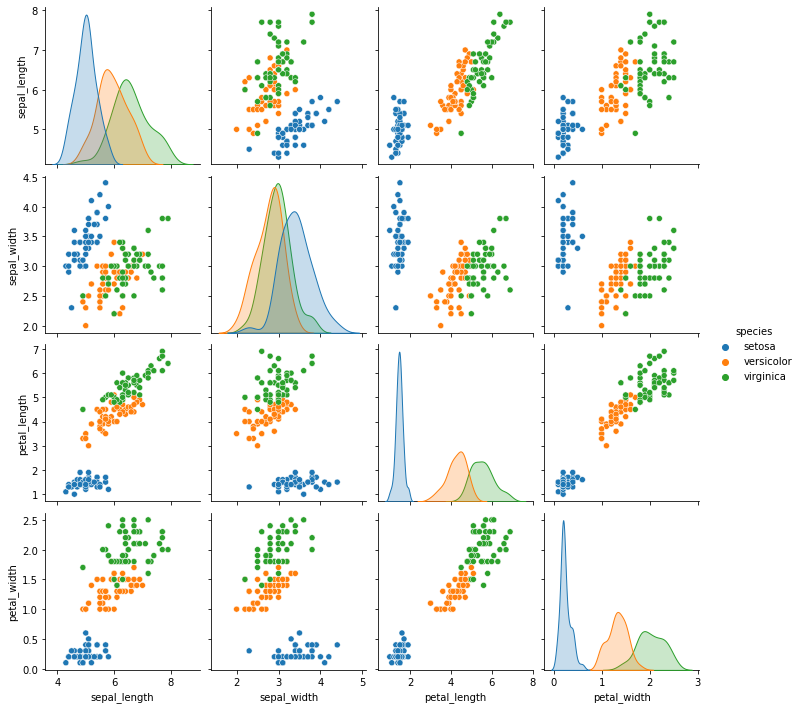

In [6]:
sns.pairplot(data=df, hue="species");

### Scaling Data

**The K-means algorithm definitely needs scaling**. However, if all our data has the same unit of measure, **there is no need to scale the data**. For these data, scaling may cause worse results in some cases. You have to experience

In [ ]:
# Not: Eğer verimizdeki tüm numerik veriler aynı metrik ile ölçeklendirilmişse
# Tekrar scale işlemi yapmamıza gerek yoktur.

### K_Means Clustering

In [7]:
X = df.drop("species", axis=1)

In [8]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
X.shape

(150, 4)

In [10]:
K_means_model = KMeans(n_clusters=5, random_state=42)

In [11]:
K_means_model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [12]:
K_means_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3], dtype=int32)

In [13]:
X["Classes"] = K_means_model.labels_

In [14]:
X

,sepal_length,sepal_width,petal_length,petal_width,Classes
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,4
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,4
148,6.2,3.4,5.4,2.3,4


### Hopkins test

In [16]:
X = X.drop("Classes", axis=1)

In [17]:
# !pip install pyclustertend

In [18]:
from pyclustertend import hopkins

In [19]:
hopkins(X, X.shape[0]) # Threshhold değeri 0.5 den küçük olduğu için modelimiz kümeleme için uygun

0.17104320750090457

## Choosing The Optimal Number of Clusters

### Elbow metod

In [20]:
ssd = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)
    
# inertia uyuşuk anlamı var. her model için hatalar inertia içinde toplanıyor

In [21]:
model.inertia_

28.063274732725528

Text(0.5, 1.0, 'elbow method')

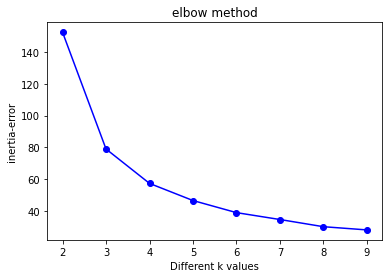

In [22]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method") 
# min cluster sayısıyla minimum hatayı yakalamak.keskin düşüşün durduğu noktanın başlangıcı seçiliyor.

In [23]:
ssd

[152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 38.930963049671746,
 34.598978434287126,
 30.085307692307698,
 28.063274732725528]

In [24]:
pd.Series(ssd).diff()

0          NaN
1   -73.427865
2   -21.622968
3   -10.782291
4    -7.604619
5    -4.331985
6    -4.513671
7    -2.022033
dtype: float64

In [25]:
pd.DataFrame(-pd.Series(ssd).diff(), index=range(1,8)) 
# DataFrame oluştururken index kullanırsak DataFrame NaN değerleri almıyor.

,0
1,73.427865
2,21.622968
3,10.782291
4,7.604619
5,4.331985
6,4.513671
7,2.022033


In [26]:
df_diff = pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff
# NaN değerleri de görmek için bu kodu kullandık
# Theory de en keskin düşüsün durduğu noktanın başlangıcı en iyi k değeridir.

,0
1,NaN
2,73.427865
3,21.622968
4,10.782291
5,7.604619
6,4.331985
7,4.513671
8,2.022033


<AxesSubplot:>

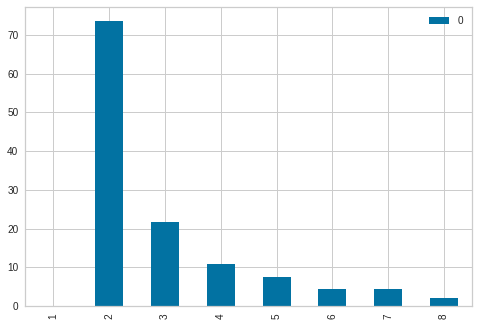

In [31]:
df_diff.plot(kind="bar")

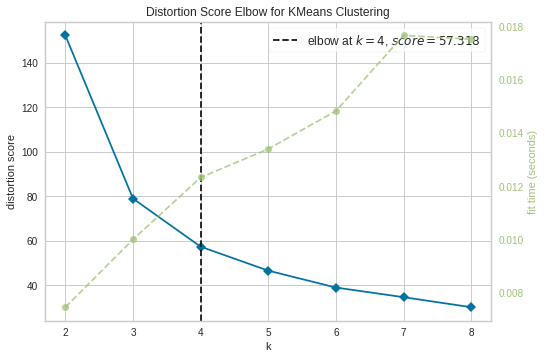

In [27]:
from yellowbrick.cluster import KElbowVisualizer
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();
# Normalde en keskin düşüsün durduğu noktanın başlangıcı 3 fakat yellowbrick
# 4 olarak seçti. Çünkü yellowbrick aynı zamanda kümeler arasındaki  uzaklığa da bakıyor. 

### Silhouette analysis

In [29]:
from sklearn.metrics import silhouette_score

In [30]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")
# silhouette_score değerlerine göre en iyi sayının 3 olduğunu görüyoruz.
# Not: silhouette_score ne kadar 1 e yakınsa kümeleme o kadar iyidir.

For n_clusters=2, the silhouette score is 0.6808136202936816
For n_clusters=3, the silhouette score is 0.5525919445499757
For n_clusters=4, the silhouette score is 0.4978256901095472
For n_clusters=5, the silhouette score is 0.4885175508886279
For n_clusters=6, the silhouette score is 0.36820569682713084
For n_clusters=7, the silhouette score is 0.3576975600180635
For n_clusters=8, the silhouette score is 0.35912838676456094


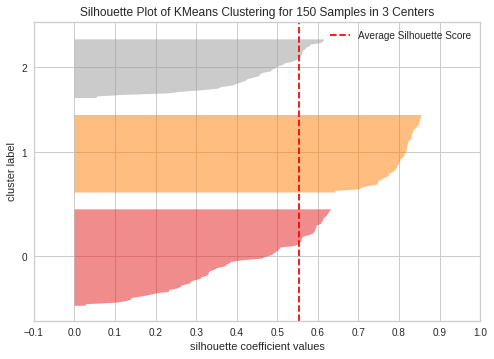

In [32]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
model3 = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model3)
visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();
# Karar verdiğimiz 3 sayısı ile oluşturulan kümelerin silhouette_score bu kod ile kontrol ediyoruz.

### Building the model based on the optimal number of clusters

In [33]:
model = KMeans(n_clusters=3, random_state=42)

In [34]:
K_means_model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [35]:
K_means_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3], dtype=int32)

In [37]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [38]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df["predicted_cluasters"] = cluster

### Adjust Rand Score

### Visualization Clusters

In [ ]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = df.predicted_clusters, cmap = "viridis")

### Remodeling according to discriminating features

### Hopkins test

### Elbow metod

### Silhouette analysis

### Building the model based on the optimal number of clusters

### Adjust Rand Score

### Compare results

### Prediction cluster of new data